# **Enhancing the Search for Scientific Articles: An Embedding Fine-Tuning Approach for Efficient Retrieval**

**Course:** MC959/MO810 – Topics in Artificial Intelligence (Introduction to Self-Supervised Learning)

**Teacher:** Dr. Marcelo da Silva Reis

**Authors:**

- **Luis F. Solis Navarro**  
  Email 📧: [l214616@dac.unicamp.br](mailto:l214616@dac.unicamp.br)  
  RA: 214616

- **Ronaldinho Vega Centeno Olivera**  
  Email 📧: [r183585@dac.unicamp.br](mailto:r183585@dac.unicamp.br)  
  RA: 183585

- **Gabriel Ukstin Talasso**  
  Email 📧: [g2350785@dac.unicamp.br](mailto:g2350785@dac.unicamp.br)  
  RA: 235078

- **Alexander Puma Pucho**  
  Email 📧: [a259936@dac.unicamp.br](mailto:a259936@dac.unicamp.br)  
  RA: 259936



## License

This project is licensed under the **[GNU General Public License v3.0](https://www.gnu.org/licenses/gpl-3.0.en.html)** (GPL-3.0).

```
GNU GENERAL PUBLIC LICENSE
Version 3, 29 June 2007
Copyright (C) 2024
```




This notebook presents the implementation of the code to develop the proposed solution, which aims to optimize the performance of a dense representation model, such as BERT, for the task of scientific article retrieval. The strategy is approached in two sequential stages:

1. Self-supervised Pretraining: In the first phase, continuous pretraining of the model is conducted in a self-supervised manner to improve its representation capabilities using unlabeled data.

2. Supervised Fine-tuning: In the second stage, the model is fine-tuned in a supervised manner using a labeled dataset to enhance its performance specifically for scientific article retrieval.

## Table of Contents

[Enhancing the Search for Scientific Articles: An Embedding Fine-Tuning Approach for Efficient Retrieval](#enhancing-the-search-for-scientific-articles-an-embedding-fine-tuning-approach-for-efficient-retrieval)

>> [License](#license)

>> [Table of Contents](#table-of-contents)

[Initial Setup](#initial-setup)

>> [Install Libraries](#install-libraries)

>> [Import Libraries](#import-libraries)

>>> [Principal Parameters](#principal-parameters)

[MLM Training for Bert Embedding Model](#mlm-training-for-bert-embedding-model)

>> [Import Dataset](#import-dataset)

>> [Dataset for Training MLM Bert Model](#dataset-for-training-mlm-bert-model)

>>> [Dataset for Training MLM Model](#dataset-for-training-mlm-model)

>> [Dataset for Test](#dataset-for-test)

>> [Load Pre-trained Language Model](#load-pre-trained-language-model)

>> [Model Validation](#model-validation)

>> [Use the Model Trained](#use-the-model-trained)

>> [Save Model in Local Storage](#save-model-in-local-storage)

[Supervised Fine-Tuning with Sentence Transformers](#supervised-fine-tuning-with-sentence-transformers)

>> [Import the Saved Model](#import-the-saved-model)

>> [LoRA Config for Training in Supervised Way](#lora-config-for-training-in-supervised-way)

>> [Get the Training Dataset](#get-the-training-dataset)

>> [Create a Dataloader](#create-a-dataloader)

>> [Custom Loss Function](#custom-loss-function)

>> [Custom Training](#custom-training)

>>> [Custom Evaluator Dataset](#custom-evaluator-dataset)

>> [Train the Model](#train-the-model)

[Evaluate Model](#evaluate-model)

[Scientific Articles Retriever](#scientific-articles-retriever)

>> [Creating Embedder and VectorDB](#creating-embedder-and-vectordb)

>> [Retriever](#retriever)

[References for this Implementation](#references-for-this-implementation)


>[Enhancing the Search for Scientific Articles: An Embedding Fine-Tuning Approach for Efficient Retrieval](#scrollTo=tpMKJpBlIF4T)

>>[License](#scrollTo=AIQL2IJWKSPG)

>>[Table of Contents](#scrollTo=6VEtCI3JZB4S)

>[Initial Setup](#scrollTo=Xb_O8QGbQLUL)

>>[Install Librariers](#scrollTo=Z7T7HeEhRm-x)

>>[Import Libraries](#scrollTo=ezajRjSbIEHU)

>>>[Principal parameters](#scrollTo=s48kYpLZG9O6)

>[MLM Training for Bert Embedding Model](#scrollTo=WC1iRlC91HCy)

>>[Import Dataset](#scrollTo=QqBsWOe5SlYb)

>>[Dataset for Training  MLM Bert Model](#scrollTo=5gSd581CxtWR)

>>>[Dataset for training MLM Model](#scrollTo=WbOWBxiQyA-R)

>>[Dataset For Test](#scrollTo=xqNQJ1lryF4x)

>>[Load de Pre-trained Language model](#scrollTo=vp7AKBPtS_62)

>>[Model Validation](#scrollTo=ITlMph-NyuaW)

>>[Use the model Trained](#scrollTo=0yPCWiZoy9lU)

>>[Save model in local storage](#scrollTo=74X2JzyLTqLn)

>[Supervised Finetunning with Sentense Transformers](#scrollTo=isX52o0q4qaR)

>>[Import the model saved](#scrollTo=5N_DzGECVr2q)

>>[Lora Config for Training in Supervised Way](#scrollTo=NTphNv1kzUm9)

>>[Get the training dataset](#scrollTo=MueppwDzVwZa)

>>[Create a Dataloader](#scrollTo=OrVKY-tJV61D)

>>[Custom Loss Function](#scrollTo=zQUBBC2CWBXl)

>>[Custom Training](#scrollTo=S_StTy_KWDZU)

>>>[Custom Evaluator dataset](#scrollTo=n3ysoCAIPE22)

>>[Train the Model](#scrollTo=7yiyr12LWE47)

>[Evaluate Model](#scrollTo=hsc-LwJA9eKY)

>[Scientific Articles Retriever](#scrollTo=ULzWJy818tss)

>>[Creating Embedder and VectorDBCreating Embedder and VectorDB](#scrollTo=LPAJQwBD9D-C)

>>[Retriever](#scrollTo=p4vcJ4aV9ShP)

>[References for this implementation:](#scrollTo=LECErHOGOBeY)



#Initial Setup

## Install Librariers

In [ ]:
%%capture
!pip install datasets
!pip install -U langchain-community
!pip install chromadb
!pip uninstall sentence-transformers -y
!pip install sentence-transformers

##Import Libraries

In [ ]:
from transformers import BertTokenizer, BertForMaskedLM
import torch
import pandas as pd
from datasets import load_dataset

### Principal parameters

In [ ]:
## Dataset

## DATA FOR TRAINING

TRAINING_DATASET_PATH = 'https://drive.google.com/uc?id=1D4BJtEf66LQiWC4RCt6_gOglRlh0a9Wk'

TRAINING_EXAMPLES = 10000


TRAINING_DATASET_HF_PATH = 'https://drive.google.com/uc?id=1y02I9YfsYmmCJiQbWk_lAn4NBYdUefZv' # train_dataset.json - Hugging Face TRAIN
EVALUATION_DATASET_HF_PATH = 'https://drive.google.com/uc?id=1uyihllWtAkNdQin8kziEhcWhiBGgF4cx' # eval_dataset.json - Hugging Face EVAL

## DATA FOR TESTING
TEST_DATASET_PATH = "CShorten/ML-ArXiv-Papers"

TEST_DATASET_HF_PATH = 'https://drive.google.com/uc?id=16f1r-qp2EzzhcBB8cEK70ua1J1_EBnVX' # test_dataset.json - HF
TEST_EXAMPLES =2000


## Retriever Data

RETRIEVER_DATASET_PATH =  'https://drive.google.com/uc?id=1Sj2CwiSQ5ZFiqImrDr48rcyt6bPtxZ8F'

## LoRa Config
lora_r = 128

## Base Model
BASE_MODEL_NAME = 'bert-base-uncased'

#MLM Training for Bert Embedding Model

In the first stage, we perform Masked Language Modeling (MLM) training of the BERT encoder using a corpus of titles and abstracts from academic articles on arXiv. To optimize the training process, 80% of the model's parameters are frozen, allowing the remaining 20% to be trained. Once this training is completed, the generated model will be used as the foundation for the second stage of the process.

## Import Dataset

## Dataset for Training  MLM Bert Model

In [ ]:
import datasets
dataset_name = "CShorten/ML-ArXiv-Papers"

train_size = 10000


train_str = "train[:" + str(train_size) + "]"

#import first 1000 examples
papers_train = datasets.load_dataset(dataset_name, split=train_str)

README.md:   0%|          | 0.00/986 [00:00<?, ?B/s]

ML-Arxiv-Papers.csv:   0%|          | 0.00/147M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/117592 [00:00<?, ? examples/s]

In [ ]:
papers_data = papers_train.to_pandas()
papers_data.head()

,Unnamed: 0.1,Unnamed: 0,title,abstract
0,0,0.0,Learning from compressed observations,The problem of statistical learning is to co...
1,1,1.0,Sensor Networks with Random Links: Topology De...,"In a sensor network, in practice, the commun..."
2,2,2.0,The on-line shortest path problem under partia...,The on-line shortest path problem is conside...
3,3,3.0,A neural network approach to ordinal regression,Ordinal regression is an important type of l...
4,4,4.0,Parametric Learning and Monte Carlo Optimization,This paper uncovers and explores the close r...


In [ ]:
papers_data['content_paper'] = papers_data['title'] +' '+ papers_data['abstract']
papers_data = papers_data.iloc[:TRAINING_EXAMPLES]

In [ ]:
len(papers_data)

10000

### Dataset for training MLM Model

In [ ]:
train_examples_mlm = papers_data['content_paper'].to_list()
train_examples_mlm[:1]

['Learning from compressed observations   The problem of statistical learning is to construct a predictor of a random\nvariable $Y$ as a function of a related random variable $X$ on the basis of an\ni.i.d. training sample from the joint distribution of $(X,Y)$. Allowable\npredictors are drawn from some specified class, and the goal is to approach\nasymptotically the performance (expected loss) of the best predictor in the\nclass. We consider the setting in which one has perfect observation of the\n$X$-part of the sample, while the $Y$-part has to be communicated at some\nfinite bit rate. The encoding of the $Y$-values is allowed to depend on the\n$X$-values. Under suitable regularity conditions on the admissible predictors,\nthe underlying family of probability distributions and the loss function, we\ngive an information-theoretic characterization of achievable predictor\nperformance in terms of conditional distortion-rate functions. The ideas are\nillustrated on the example of nonpara

## Dataset For Test

This dataset will be only used for eval the models Trained

In [ ]:

# Define split strings for slicing
test_str = f"train[:{TEST_EXAMPLES}]"

# Load the dataset with the specified splits
papers_test = load_dataset(TEST_DATASET_PATH, split=test_str)

# Print dataset statistics
print(f"Test size: {len(papers_test)}")

# Example of dataset preview
print(papers_test[0])



Test size: 2000
{'Unnamed: 0.1': 0, 'Unnamed: 0': 0.0, 'title': 'Learning from compressed observations', 'abstract': '  The problem of statistical learning is to construct a predictor of a random\nvariable $Y$ as a function of a related random variable $X$ on the basis of an\ni.i.d. training sample from the joint distribution of $(X,Y)$. Allowable\npredictors are drawn from some specified class, and the goal is to approach\nasymptotically the performance (expected loss) of the best predictor in the\nclass. We consider the setting in which one has perfect observation of the\n$X$-part of the sample, while the $Y$-part has to be communicated at some\nfinite bit rate. The encoding of the $Y$-values is allowed to depend on the\n$X$-values. Under suitable regularity conditions on the admissible predictors,\nthe underlying family of probability distributions and the loss function, we\ngive an information-theoretic characterization of achievable predictor\nperformance in terms of conditional d

In [ ]:
test_examples_mlm = []
for i in range(len(papers_test)):
    test_examples_mlm.append(papers_test[i]['title'] +' '+ papers_test[i]['abstract'])

## Load de Pre-trained Language model

In [ ]:
tokenizer = BertTokenizer.from_pretrained(BASE_MODEL_NAME)
base_model = BertForMaskedLM.from_pretrained(BASE_MODEL_NAME)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

BertForMaskedLM has generative capabilities, as `prepare_inputs_for_generation` is explicitly overwritten. However, it doesn't directly inherit from `GenerationMixin`. From 👉v4.50👈 onwards, `PreTrainedModel` will NOT inherit from `GenerationMixin`, and this model will lose the ability to call `generate` and other related functions.
  - If you're using `trust_remote_code=True`, you can get rid of this warning by loading the model with an auto class. See https://huggingface.co/docs/transformers/en/model_doc/auto#auto-classes
  - If you are the owner of the model architecture code, please modify your model class such that it inherits from `GenerationMixin` (after `PreTrainedModel`, otherwise you'll get an exception).
  - If you are not the owner of the model architecture class, please contact the model code owner to update it.
Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'c

First, we'll tokenize our text.

In [ ]:
inputs = tokenizer(train_examples_mlm, return_tensors='pt', max_length=512, truncation=True, padding='max_length')

In [ ]:
inputs['input_ids'].shape

torch.Size([10000, 512])

Then we create our *labels* tensor by cloning the *input_ids* tensor.

In [ ]:
inputs['labels'] = inputs.input_ids.detach().clone()

In [ ]:
inputs.keys()

dict_keys(['input_ids', 'token_type_ids', 'attention_mask', 'labels'])

Now we mask tokens in the *input_ids* tensor, using the 15% probability we used before - and the **not** a *CLS* or *SEP* token condition. This time, because we have padding tokens we also need to exclude *PAD* tokens (*0* input ids).

In [ ]:
# create random array of floats with equal dimensions to input_ids tensor
rand = torch.rand(inputs.input_ids.shape)
# create mask array
mask_arr = (rand < 0.15) * (inputs.input_ids != 101) * \
           (inputs.input_ids != 102) * (inputs.input_ids != 0)

And now we take take the indices of each `True` value, within each individual vector.

In [ ]:
selection = []

for i in range(inputs.input_ids.shape[0]):
    selection.append(
        torch.flatten(mask_arr[i].nonzero()).tolist()
    )

Then apply these indices to each respective row in *input_ids*, assigning each of the values at these indices as *103*.

In [ ]:
for i in range(inputs.input_ids.shape[0]):
    inputs.input_ids[i, selection[i]] = 103

In [ ]:
inputs.input_ids

tensor([[  101,  4083,  2013,  ...,     0,     0,     0],
        [  101, 13617,  6125,  ...,     0,     0,     0],
        [  101,  1996,   103,  ...,     0,     0,     0],
        ...,
        [  101,  1037,  9207,  ...,     0,     0,     0],
        [  101,  3444, 14676,  ...,     0,     0,     0],
        [  101,  1996,  8934,  ...,     0,     0,     0]])

We can see the values *103* have been assigned in the same positions as we found *True* values in the `mask_arr` tensor.

The `inputs` tensors are now ready, and can we can begin setting them up to be fed into our model during training. We create a PyTorch dataset from our data.

In [ ]:
class ArxivDataset(torch.utils.data.Dataset):
    def __init__(self, encodings):
        self.encodings = encodings
    def __getitem__(self, idx):
        return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
    def __len__(self):
        return len(self.encodings.input_ids)

Initialize our data using the `ArxviDataset` class.

In [ ]:
dataset = ArxivDataset(inputs)

And initialize the dataloader, which we'll be using to load our data into the model during training.

In [ ]:
loader = torch.utils.data.DataLoader(dataset, batch_size=16, shuffle=True)

Now we can move onto setting up the training loop. First we setup GPU/CPU usage.

In [ ]:

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
# and move our model over to the selected device
base_model.to(device)

BertForMaskedLM(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwi

**Freeze the first 10 layers**


In [ ]:
# Freeze the first N layers
freeze_layers = 9

for name, param in base_model.bert.encoder.layer[:freeze_layers].named_parameters():
    param.requires_grad = False
    print(f"Froze layer: {name}")

# Freeze the embedding layer as well
for name, param in base_model.bert.embeddings.named_parameters():
    param.requires_grad = False
    print(f"Froze embedding: {name}")

Froze layer: 0.attention.self.query.weight
Froze layer: 0.attention.self.query.bias
Froze layer: 0.attention.self.key.weight
Froze layer: 0.attention.self.key.bias
Froze layer: 0.attention.self.value.weight
Froze layer: 0.attention.self.value.bias
Froze layer: 0.attention.output.dense.weight
Froze layer: 0.attention.output.dense.bias
Froze layer: 0.attention.output.LayerNorm.weight
Froze layer: 0.attention.output.LayerNorm.bias
Froze layer: 0.intermediate.dense.weight
Froze layer: 0.intermediate.dense.bias
Froze layer: 0.output.dense.weight
Froze layer: 0.output.dense.bias
Froze layer: 0.output.LayerNorm.weight
Froze layer: 0.output.LayerNorm.bias
Froze layer: 1.attention.self.query.weight
Froze layer: 1.attention.self.query.bias
Froze layer: 1.attention.self.key.weight
Froze layer: 1.attention.self.key.bias
Froze layer: 1.attention.self.value.weight
Froze layer: 1.attention.self.value.bias
Froze layer: 1.attention.output.dense.weight
Froze layer: 1.attention.output.dense.bias
Froze la

In [ ]:
# Calculate trainable and total parameters
trainable_params = [(name, param.shape) for name, param in base_model.named_parameters() if param.requires_grad]
total_params = [(name, param.shape) for name, param in base_model.named_parameters()]

# Count the number of parameters
total_trainable_params = sum(p.numel() for p in base_model.parameters() if p.requires_grad)
total_params_count = sum(p.numel() for p in base_model.parameters())

# Calculate percentage of trainable parameters
trainable_percentage = (total_trainable_params / total_params_count) * 100


print(f"\nTotal Trainable Parameters: {total_trainable_params}")
print(f"Total Parameters in Model: {total_params_count}")
print(f"Percentage of Trainable Parameters: {trainable_percentage:.2f}%")



Total Trainable Parameters: 21886266
Total Parameters in Model: 109514298
Percentage of Trainable Parameters: 19.98%


Activate the training mode of our model, and initialize our optimizer (Adam with weighted decay - reduces chance of overfitting).

In [ ]:
from transformers import AdamW

# activate training mode
base_model.train()
# initialize optimizer
optim = AdamW(base_model.parameters(), lr=5e-5)

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Now we can move onto the training loop, we'll train for two epochs (change `epochs` to modify this).

  0%|          | 0/625 [00:00<?, ?it/s]<ipython-input-22-77bccd8cb49c>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
Epoch 3: 100%|██████████| 625/625 [10:10<00:00,  1.02it/s, loss=0.418]


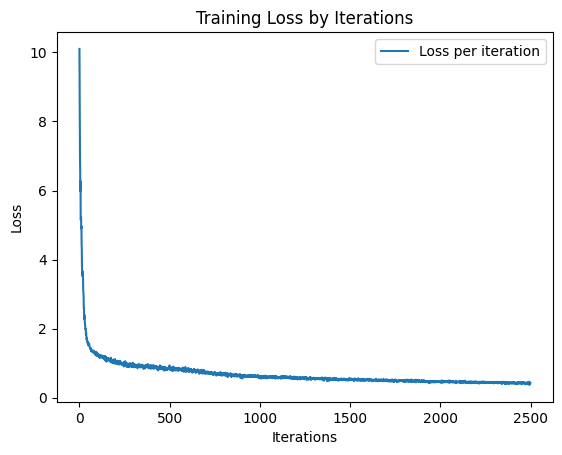

In [ ]:
import matplotlib.pyplot as plt
from tqdm import tqdm  # for our progress bar

# Initialize list to store loss values
loss_values = []
epochs = 4

for epoch in range(epochs):
    # setup loop with TQDM and dataloader
    loop = tqdm(loader, leave=True)
    for batch in loop:
        # initialize calculated gradients (from prev step)
        optim.zero_grad()
        # pull all tensor batches required for training
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        # process
        outputs = base_model(input_ids, attention_mask=attention_mask, labels=labels)

        # extract loss
        loss = outputs.loss

        # calculate loss for every parameter that needs grad update
        loss.backward()

        # update parameters
        optim.step()

        # store loss for each batch
        loss_values.append(loss.item())

        # print relevant info to progress bar
        loop.set_description(f'Epoch {epoch}')
        loop.set_postfix(loss=loss.item())

# Plotting the loss values over iterations
plt.plot(loss_values, label="Loss per iteration")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Training Loss by Iterations")
plt.legend()
plt.show()


## Model Validation

In [ ]:
# Tokenize the list of text
tokenized_texts = tokenizer(test_examples_mlm, truncation=True, padding="max_length", max_length=512, return_tensors="pt")

# Create a dataset for DataLoader
class TextDataset(torch.utils.data.Dataset):
    def __init__(self, tokenized_data):
        self.input_ids = tokenized_data["input_ids"]
        self.attention_mask = tokenized_data["attention_mask"]

    def __len__(self):
        return len(self.input_ids)

    def __getitem__(self, idx):
        return {
            "input_ids": self.input_ids[idx],
            "attention_mask": self.attention_mask[idx],
            "labels": self.input_ids[idx],  # For MLM, labels are same as input_ids
        }

# Convert tokenized texts to dataset
eval_dataset = TextDataset(tokenized_texts)

Evaluating: 100%|██████████| 125/125 [01:16<00:00,  1.63it/s, loss=0.721]


Validation Loss: 0.7089578690528869


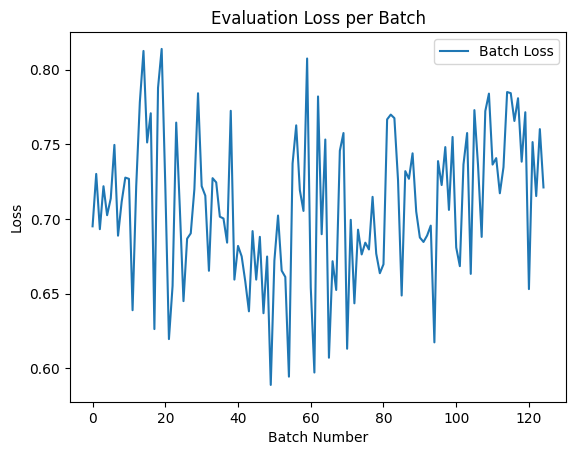

In [ ]:
import matplotlib.pyplot as plt
from tqdm import tqdm
from torch.utils.data import DataLoader

# Create DataLoader
eval_loader = DataLoader(eval_dataset, batch_size=16)

base_model.to(device)


# Initialize metrics
batch_losses = []  # To store loss for each batch
total_loss = 0
num_batches = 0

# Evaluate the model
with torch.no_grad():
    loop = tqdm(eval_loader, leave=True)
    for batch in loop:
        # Move batch to device
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["labels"].to(device)

        # Get outputs
        outputs = base_model(input_ids, attention_mask=attention_mask, labels=labels)

        # Accumulate loss
        loss = outputs.loss.item()
        batch_losses.append(loss)
        total_loss += loss
        num_batches += 1

        # Update progress bar
        loop.set_description("Evaluating")
        loop.set_postfix(loss=loss)

# Calculate average loss
avg_loss = total_loss / num_batches
print(f"Validation Loss: {avg_loss}")

# Plot batch losses
plt.plot(batch_losses, label="Batch Loss")
plt.xlabel("Batch Number")
plt.ylabel("Loss")
plt.title("Evaluation Loss per Batch")
plt.legend()
plt.show()

## Use the model Trained

In [ ]:
# Example usage for Masked Language Modeling
input_text = "Surveys from artificial intelligence and machine [MASK]."
inputs = tokenizer(input_text, return_tensors="pt").to(device)
outputs = base_model(**inputs)

# Get predictions for the masked token
import torch

logits = outputs.logits
masked_index = torch.where(inputs.input_ids == tokenizer.mask_token_id)[1]
predicted_token_id = logits[0, masked_index].argmax(axis=-1)
predicted_token = tokenizer.decode(predicted_token_id)

print(f"Predicted token: {predicted_token}")


Predicted token: [PAD]


## Save model in local storage

In [ ]:
base_model.save_pretrained("./ArxBert-MLM_v2")
tokenizer.save_pretrained("./ArxBert-MLM_v2")

('./ArxBert-MLM_v2/tokenizer_config.json',
 './ArxBert-MLM_v2/special_tokens_map.json',
 './ArxBert-MLM_v2/vocab.txt',
 './ArxBert-MLM_v2/added_tokens.json')

# Supervised Finetunning with Sentense Transformers

In the second stage, we train the model that has been previously adapted to the domain. A contrastive learning approach is employed to enhance the model's ability to distinguish between relevant and irrelevant examples. Additionally, the LoRA (Low-Rank Adaptation) technique is used for efficient parameter tuning, optimizing the number of parameters to be trained and improving the model's performance in a more resource-efficient manner.

## Import the model saved

In [ ]:
from sentence_transformers import SentenceTransformer, models

# Step 2: Load the fine-tuned model using model_name_or_path
word_embedding_model = models.Transformer(model_name_or_path='/content/ArxBert-MLM')

# Step 3: Add a Pooling layer to aggregate the embeddings
pooling_model = models.Pooling(word_embedding_model.get_word_embedding_dimension())

# Step 4: Create the SentenceTransformer model using the Transformer and Pooling modules
sentence_model = SentenceTransformer(modules=[word_embedding_model, pooling_model])

# Step 5: Verify that the model works correctly by encoding a sample sentence
sentence = "Clustering with Transitive Distance and K-Means Duality."
embedding = sentence_model.encode(sentence)

print(f"Embedding shape: {embedding.shape}")

Some weights of BertModel were not initialized from the model checkpoint at /content/ArxBert-MLM and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Embedding shape: (768,)


## Lora Config for Training in Supervised Way

In [ ]:
# Configuración LoRA
from peft import get_peft_model, LoraConfig, TaskType

lora_config = LoraConfig(
    r=lora_r,  # Rank
    lora_alpha=32,  # Alpha scaling
    target_modules=["query", "value"],  # Aplicar LoRA en capas de atención
    bias="none"
)

In [ ]:
sentence_transformer_model = get_peft_model(sentence_model, lora_config)

In [ ]:
# Step 5: Check trainable parameters
def count_trainable_parameters(model):
    total_params = sum(p.numel() for p in sentence_transformer_model.parameters())
    trainable_params = sum(p.numel() for p in sentence_transformer_model.parameters() if p.requires_grad)
    print(f"Total Parameters: {total_params:,}")
    print(f"Trainable Parameters: {trainable_params:,}")
    print(f"Percentage Trainable: {trainable_params / total_params:.2%}")

count_trainable_parameters(sentence_transformer_model)

Total Parameters: 114,200,832
Trainable Parameters: 4,718,592
Percentage Trainable: 4.13%


## Get the training dataset


In [ ]:
## Train with HF Dataset
train_dataset_hf= load_dataset("json", data_files=TRAINING_DATASET_HF_PATH, split="train")

Generating train split: 0 examples [00:00, ? examples/s]

## Create a Dataloader

In [ ]:
from torch.utils.data import DataLoader

train_dataloader_st = DataLoader(train_dataset_hf, shuffle=True, batch_size=16)

## Custom Loss Function

In [ ]:
from sentence_transformers import SentenceTransformer, SentenceTransformerTrainer, losses

train_loss = losses.MultipleNegativesRankingLoss(sentence_transformer_model)


## Custom Training

###Custom Evaluator dataset

In [ ]:
from datasets import load_dataset, concatenate_datasets


eval_dataset = load_dataset("json", data_files=EVALUATION_DATASET_HF_PATH, split="train")
train_dataset = load_dataset("json", data_files=TRAINING_DATASET_HF_PATH, split="train")

corpus_dataset = concatenate_datasets([train_dataset, eval_dataset])

# Convert the datasets to dictionaries
corpus = dict(zip(corpus_dataset["id"], corpus_dataset["positive"]))
queries = dict(zip(eval_dataset["id"], eval_dataset["anchor"]))

relevant_docs = {}
for q_id in queries:
    relevant_docs[q_id] = [q_id]


Generating train split: 0 examples [00:00, ? examples/s]

In [ ]:
from sentence_transformers.evaluation import InformationRetrievalEvaluator
from sentence_transformers.util import cos_sim

model_evaluator = InformationRetrievalEvaluator(
    queries=queries,
    corpus=corpus,
    relevant_docs=relevant_docs,
    name='repo_name',
    score_functions={"cosine": cos_sim},
)

In [ ]:
from sentence_transformers.training_args import SentenceTransformerTrainingArguments
from sentence_transformers.training_args import BatchSamplers

args = SentenceTransformerTrainingArguments(
    # Required parameter:
    output_dir="arxbert-sentence-transformer-ft",
    # Optional training parameters:
    num_train_epochs=3,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=16,
    learning_rate=2e-5,
    warmup_ratio=0.1,
    fp16=True,  # Set to False if you get an error that your GPU can't run on FP16
    bf16=False,  # Set to True if you have a GPU that supports BF16
    batch_sampler=BatchSamplers.NO_DUPLICATES,  # losses that use "in-batch negatives" benefit from no duplicates
    # Optional tracking/debugging parameters:
    eval_strategy="steps",
    eval_steps=100,
    save_strategy="steps",
    save_steps=100,
    save_total_limit=2,
    logging_steps=100,
    report_to = 'none',
)

trainer = SentenceTransformerTrainer(
    model=sentence_transformer_model,
    args=args,
    train_dataset=train_dataset_hf.select_columns(["positive", "anchor"]),
    loss=train_loss,
    evaluator=model_evaluator,
)


## Train the Model

In [ ]:
import os
#disable wandb_model
os.environ["WANDB_MODE"] = "disabled"


In [ ]:
# start training the model
trainer.train()

#  The model will be saved to the the output directory
trainer.save_model()

sentence_transformer_model.save_pretrained("models/arxbert_test_trainnig")

dataset = dataset.select_columns(['anchor', 'positive', 'negative'])


Step,Training Loss,Validation Loss,Repo Name Cosine Accuracy@1,Repo Name Cosine Accuracy@3,Repo Name Cosine Accuracy@5,Repo Name Cosine Accuracy@10,Repo Name Cosine Precision@1,Repo Name Cosine Precision@3,Repo Name Cosine Precision@5,Repo Name Cosine Precision@10,Repo Name Cosine Recall@1,Repo Name Cosine Recall@3,Repo Name Cosine Recall@5,Repo Name Cosine Recall@10,Repo Name Cosine Ndcg@10,Repo Name Cosine Mrr@10,Repo Name Cosine Map@100
100,3.386800,No log,0.029000,0.051000,0.066000,0.085000,0.029000,0.017000,0.013200,0.008500,0.029000,0.051000,0.066000,0.085000,0.053945,0.044408,0.049712
200,3.008500,No log,0.173000,0.247000,0.296000,0.357000,0.173000,0.082333,0.059200,0.035700,0.173000,0.247000,0.296000,0.357000,0.254907,0.223425,0.233618
300,1.855300,No log,0.327000,0.443000,0.487000,0.563000,0.327000,0.147667,0.097400,0.056300,0.327000,0.443000,0.487000,0.563000,0.437155,0.397904,0.406229
400,1.107500,No log,0.371000,0.506000,0.558000,0.616000,0.371000,0.168667,0.111600,0.061600,0.371000,0.506000,0.558000,0.616000,0.489357,0.449268,0.457817
500,0.855100,No log,0.393000,0.527000,0.581000,0.653000,0.393000,0.175667,0.116200,0.065300,0.393000,0.527000,0.581000,0.653000,0.517410,0.474743,0.482162
600,0.735800,No log,0.417000,0.550000,0.605000,0.664000,0.417000,0.183333,0.121000,0.066400,0.417000,0.550000,0.605000,0.664000,0.536955,0.496779,0.504424
700,0.756300,No log,0.421000,0.569000,0.611000,0.672000,0.421000,0.189667,0.122200,0.067200,0.421000,0.569000,0.611000,0.672000,0.545414,0.505121,0.512853
800,0.680100,No log,0.438000,0.573000,0.623000,0.681000,0.438000,0.191000,0.124600,0.068100,0.438000,0.573000,0.623000,0.681000,0.556927,0.517630,0.525025
900,0.659800,No log,0.438000,0.576000,0.628000,0.686000,0.438000,0.192000,0.125600,0.068600,0.438000,0.576000,0.628000,0.686000,0.559279,0.519180,0.526331


In [ ]:
args.output_dir

'arxbert-sentence-transformer-ft'

# Evaluate Model

In [ ]:
# Evaluate the  fine-tuned model with Sentence Transformer
arxvbert_sentence_transformer = model_evaluator(sentence_transformer_model)

print(arxvbert_sentence_transformer)

{'repo_name_cosine_accuracy@1': 0.439, 'repo_name_cosine_accuracy@3': 0.576, 'repo_name_cosine_accuracy@5': 0.628, 'repo_name_cosine_accuracy@10': 0.686, 'repo_name_cosine_precision@1': 0.439, 'repo_name_cosine_precision@3': 0.192, 'repo_name_cosine_precision@5': 0.1256, 'repo_name_cosine_precision@10': 0.0686, 'repo_name_cosine_recall@1': 0.439, 'repo_name_cosine_recall@3': 0.576, 'repo_name_cosine_recall@5': 0.628, 'repo_name_cosine_recall@10': 0.686, 'repo_name_cosine_ndcg@10': 0.5597792606883065, 'repo_name_cosine_mrr@10': 0.5198464285714282, 'repo_name_cosine_map@100': 0.5270074894006559}


In [ ]:
## Evaluate the  Bert-base model

word_embedding_model_base = models.Transformer(model_name_or_path=BASE_MODEL_NAME)

pooling_model_base= models.Pooling(word_embedding_model_base.get_word_embedding_dimension())

bert_base = SentenceTransformer(modules=[word_embedding_model_base, pooling_model_base])

bert_base_results = model_evaluator(bert_base)

In [ ]:
## Evaluate the  ArxvBert-MLM model

arxvbert_mlm_model = models.Transformer(model_name_or_path='/content/ArxBert-MLM_v2')
arxvbert_mlm_pooling= models.Pooling(arxvbert_mlm_model.get_word_embedding_dimension())
arxvbert_mlm = SentenceTransformer(modules=[arxvbert_mlm_model, arxvbert_mlm_pooling])
arxvbert_mlm_results = model_evaluator(arxvbert_mlm)

Some weights of BertModel were not initialized from the model checkpoint at /content/ArxBert-MLM_v2 and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


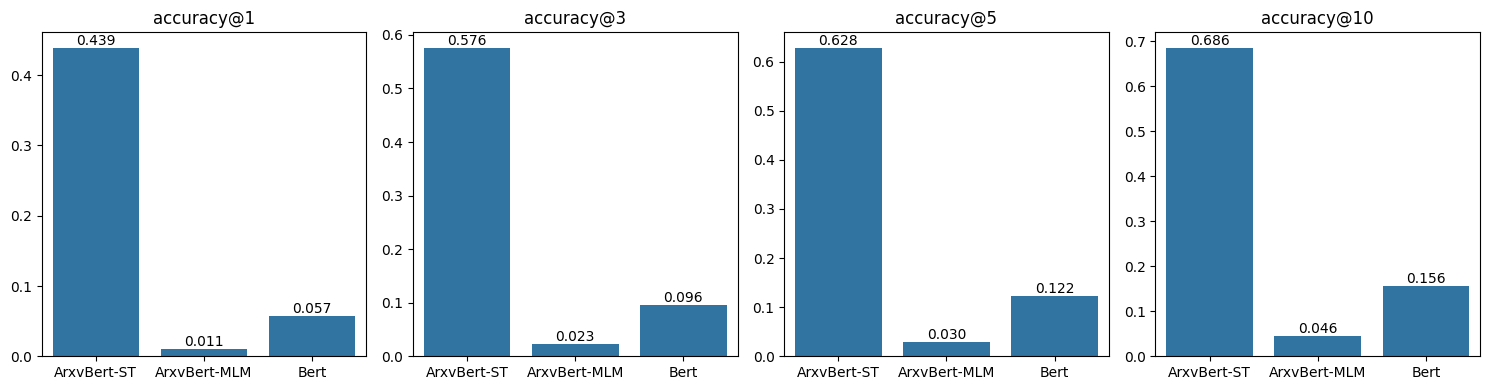

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Compare results
fig, ax = plt.subplots(1, 4, figsize=(15, 4))  # Adjusted figsize for 3 bars per plot

for i in range(4):  # Use the number of metrics you want to compare (assuming 4 metrics)
    metric = list(arxvbert_sentence_transformer.keys())[i]

    # Get values for FT, PT, and Base models
    value_st = arxvbert_sentence_transformer[metric]
    value_mlm = arxvbert_mlm_results[metric]
    value_base = bert_base_results[metric]

    # Plot bar chart for FT, PT, and Base
    sns.barplot(x=["ArxvBert-ST", "ArxvBert-MLM", 'Bert'], y=[value_st, value_mlm, value_base], ax=ax[i])
    ax[i].set_title(metric.split('cosine_')[1])  # Remove 'cosine_' from the metric name for display

    # Annotate values on the bars
    for j, v in enumerate([value_st, value_mlm, value_base]):
        ax[i].text(j, v, f"{v:.3f}", ha="center", va="bottom")

plt.tight_layout()
plt.show()



#Scientific Articles Retriever

Finally, a retrieval system based on dense representations is developed. To do this, we use our embedding model to generate dense representations of all the articles. Next, a vector database is created to store these embeddings. With this database, cosine similarity searches can be performed, allowing the retrieval of relevant articles based on a query, according to their semantic proximity within the vector space.

In [ ]:
from langchain.embeddings.sentence_transformer import SentenceTransformerEmbeddings
from langchain.vectorstores import Chroma
from langchain.schema import Document

#using only the validation set for simplicity (we can change it for entire set later)
documents = load_dataset("json", data_files=RETRIEVER_DATASET_PATH, split="train")

#each example is one chunk
documents = documents.map(lambda example: {"text": example["positive"]})

docs = []
for i in range(len(documents)):
    docs.append(Document(page_content=documents[i]["text"]))


In [ ]:
# Extract the text content from each document
texts = [doc.page_content for doc in docs]


## Creating Embedder and VectorDBCreating Embedder and VectorDB

In [ ]:
import pandas as pd
from langchain.embeddings.base import Embeddings
from sentence_transformers import SentenceTransformer
from typing import List

class SentenceTransformerEmbeddings(Embeddings):
    def __init__(self, model_name: str):
      self.model = SentenceTransformer(model_name)

    def embed_documents(self, documents: List[str]) -> List[List[float]]:
        return [self.model.encode(d).tolist() for d in documents]

    def embed_query(self, query: str) -> List[float]:
        return self.model.encode([query])[0].tolist()


In [ ]:
embeddings = SentenceTransformerEmbeddings(model_name="/content/arxbert-sentence-transformer-ft")


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/205 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/34.4k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/661 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

Some weights of the model checkpoint at lufercho/ArxvBert-ST were not used when initializing BertModel: ['encoder.layer.0.attention.self.query.base_layer.bias', 'encoder.layer.0.attention.self.query.base_layer.weight', 'encoder.layer.0.attention.self.query.lora_A.default.weight', 'encoder.layer.0.attention.self.query.lora_B.default.weight', 'encoder.layer.0.attention.self.value.base_layer.bias', 'encoder.layer.0.attention.self.value.base_layer.weight', 'encoder.layer.0.attention.self.value.lora_A.default.weight', 'encoder.layer.0.attention.self.value.lora_B.default.weight', 'encoder.layer.1.attention.self.query.base_layer.bias', 'encoder.layer.1.attention.self.query.base_layer.weight', 'encoder.layer.1.attention.self.query.lora_A.default.weight', 'encoder.layer.1.attention.self.query.lora_B.default.weight', 'encoder.layer.1.attention.self.value.base_layer.bias', 'encoder.layer.1.attention.self.value.base_layer.weight', 'encoder.layer.1.attention.self.value.lora_A.default.weight', 'enco

tokenizer_config.json:   0%|          | 0.00/1.24k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/712k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/695 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/296 [00:00<?, ?B/s]

In [ ]:
# Step 4: Generate embeddings for the documents using the custom class
document_embeddings = embeddings.embed_documents(texts, )


print("Embeddings generated successfully.")


Embeddings generated successfully.


In [ ]:
# Step 5: Initialize Chroma and store the embeddings
chroma_db = Chroma(collection_name="arxivdocs", embedding_function=embeddings)


<ipython-input-124-b5f1572a2e90>:2: LangChainDeprecationWarning: The class `Chroma` was deprecated in LangChain 0.2.9 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-chroma package and should be used instead. To use it run `pip install -U :class:`~langchain-chroma` and import as `from :class:`~langchain_chroma import Chroma``.
  chroma_db = Chroma(collection_name="arxivdocs", embedding_function=embeddings)


In [ ]:
chroma_db.add_texts(texts=texts, embeddings=document_embeddings, metadatas=[{"source": f"doc_{i}"} for i in range(len(texts))])
print("Embeddings stored in Chroma successfully.")


Embeddings stored in Chroma successfully.


## Retriever

In [ ]:
retriver = chroma_db.as_retriever(search_type="similarity", search_kwargs={"k": 10})

In [ ]:
query = 'Large Language Models'
papers_retrived = retriver.invoke(query)

In [ ]:
all_papers = load_dataset("json", data_files="eval_dataset.json", split="train")

titles = []
abs = []
for i in range(len(papers_retrived)):
  titles.append(pd.Series(all_papers['anchor'])[pd.Series(all_papers['positive']) == papers_retrived[i].page_content].values[0])
  abs.append(pd.Series(all_papers['positive'])[pd.Series(all_papers['positive']) == papers_retrived[i].page_content].values[0])

In [ ]:
titles

['An Overview on Data Representation Learning: From Traditional Feature\n  Learning to Recent Deep Learning',
 'Learning Continuous Semantic Representations of Symbolic Expressions',
 'Deep Reinforcement Learning: An Overview',
 'RSSL: Semi-supervised Learning in R',
 'A Simple Approach to Multilingual Polarity Classification in Twitter',
 'Learning to Play Guess Who? and Inventing a Grounded Language as a\n  Consequence',
 'Optimal Generalized Decision Trees via Integer Programming',
 'Playing SNES in the Retro Learning Environment',
 'Tree Space Prototypes: Another Look at Making Tree Ensembles\n  Interpretable',
 'What the Language You Tweet Says About Your Occupation']

In [ ]:
abs

['  Since about 100 years ago, to learn the intrinsic structure of data, many\nrepresentation learning approaches have been proposed, including both linear\nones and nonlinear ones, supervised ones and unsupervised ones. Particularly,\ndeep architectures are widely applied for representation learning in recent\nyears, and have delivered top results in many tasks, such as image\nclassification, object detection and speech recognition. In this paper, we\nreview the development of data representation learning methods. Specifically,\nwe investigate both traditional feature learning algorithms and\nstate-of-the-art deep learning models. The history of data representation\nlearning is introduced, while available resources (e.g. online course, tutorial\nand book information) and toolboxes are provided. Finally, we conclude this\npaper with remarks and some interesting research directions on data\nrepresentation learning.\n',
 '  Combining abstract, symbolic reasoning with continuous neural re

# References for this implementation:

*   Model: https://huggingface.co/sentence-transformers/all-mpnet-base-v2
*   Dataset:https://huggingface.co/datasets/CShorten/ML-ArXiv-Papers

*   Code base 1: https://sbert.net/docs/sentence_transformer/training_overview.html
*   Code base 2: https://www.aurelio.ai/learn/sentence-transformers-fine-tuning